In [1]:
import numpy as np
import scipy.optimize as so
import matplotlib.pyplot as plt
from cryoBIFE import neglogpost_cryobife, normal_prior
from cryoBIFE.Generate_Gaussian_Images_Toymodel import sample_grid_data
from tqdm import tqdm

In [2]:
def get_optimal_string_fe(posterior_matrix, log_prior_fxn, kappa=1.0):
    number_of_nodes = posterior_matrix.shape[1]
    G_init = 1.0 * np.random.randn(number_of_nodes)  # Initial free energy differences
    G_op = so.minimize(neglogpost_cryobife, G_init, method='L-BFGS-B', args=(kappa, posterior_matrix, log_prior_fxn))
    assert(G_op.success)
    optimal_string_fe = G_op.x
    optimal_logpost = -1 * G_op.fun
    return optimal_string_fe, optimal_logpost

In [7]:
kappa = 0.0
dT = 0.5
inverse_Ts = np.arange(1, 15 + dT, dT)

black_logposts = []
orange_logposts = []

for inv_T in tqdm(inverse_Ts):
    grid_info, black_info, orange_info = sample_grid_data(inverse_T=inv_T, N_total = 10000)
    coords, Grid, Num_images = grid_info
#     print(len(coords))
    black, Post_Matrix_black = black_info
    orange, Post_Matrix_orange = orange_info
    black_fe, black_logpost = get_optimal_string_fe(Post_Matrix_black, normal_prior, kappa=kappa)
    orange_fe, orange_logpost = get_optimal_string_fe(Post_Matrix_orange, normal_prior, kappa=kappa)
    black_logposts.append(black_logpost)
    orange_logposts.append(orange_logpost)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:40<00:00,  1.39s/it]


Text(0, 0.5, 'LogPost Black - LogPost Orange')

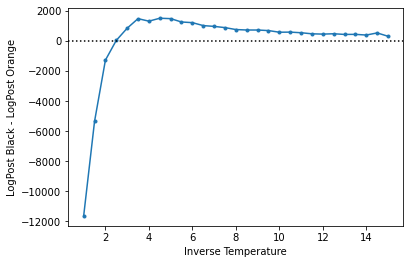

In [8]:
logpost_diff = np.array(black_logposts) - np.array(orange_logposts)

plt.plot(inverse_Ts, logpost_diff, marker='.')
plt.axhline(0, color='k', linestyle=":")
plt.xlabel("Inverse Temperature")
plt.ylabel("LogPost Black - LogPost Orange")